# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
reset -sf

---
## Step 0: Load The Data

In [2]:
!pwd

/home/carnd/CarND-Traffic-Sign-Classifier-Project


In [3]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
%matplotlib inline

import os
import cv2
from IPython.display import Image
import tensorflow as tf

In [4]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [65]:
n_train, n_validation, n_test, image_shape, n_classes

(34799, 4410, 12630, (32, 32, 3), 43)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

In [7]:
# Take the first 10 random sample of images and show
def plot_img(X, y, sample=10):
    print(X.shape, y.shape)
    label = pd.read_csv("signnames.csv")
    plt.figure(figsize=(18, 7))
    for n in range(sample):
        plt.subplot(2, sample/2, n+1)
        random_int = random.randint(0, len(X))
        plt.axis('off')
        plt.title(label['SignName'][y[random_int]])
        plt.imshow(X[random_int].squeeze())

(34799, 32, 32, 3) (34799,)


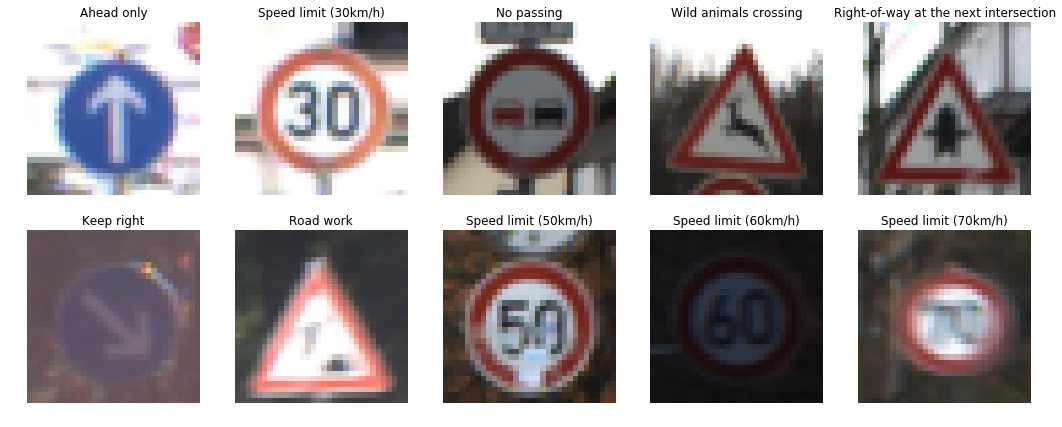

In [12]:
plot_img(X_train, y_train)

In [13]:
# plotting count of sign(label)
def plot_cnt(y, dataname):
    plt.figure(figsize=(18, 7))
    plt.hist(y, len(set(y)), edgecolor='black', linewidth=1.5)
    plt.axis('tight')
    plt.grid(linestyle='--')
    plt.title('Number of Class/Label in {0} Dataset'.format(dataname), fontsize=20)
    plt.xlabel('Class/Label', fontsize=15)
    plt.ylabel('Number of Count', fontsize=15)
    print('Total Number of Dataset: {0}'.format(len(y)))

Total Number of Dataset: 34799


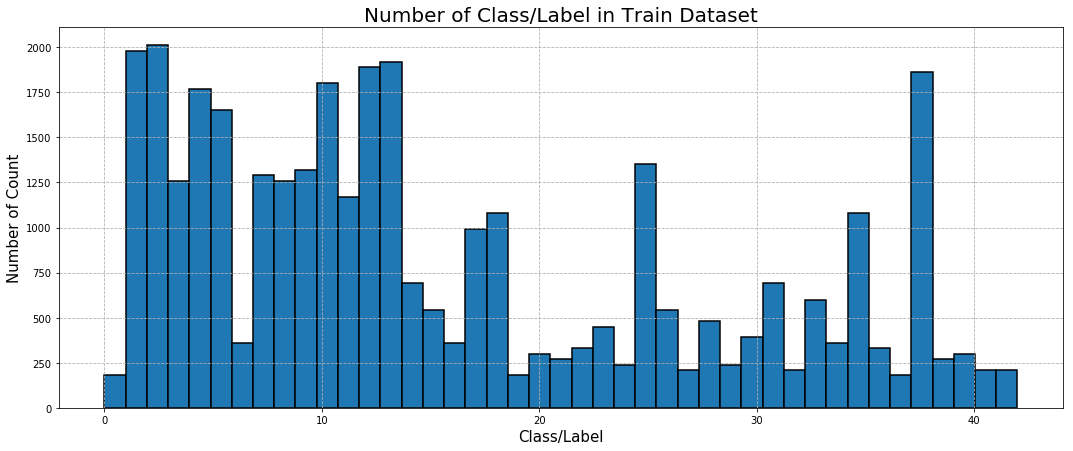

In [14]:
plot_cnt(y_train, 'Train');

Total Number of Dataset: 4410


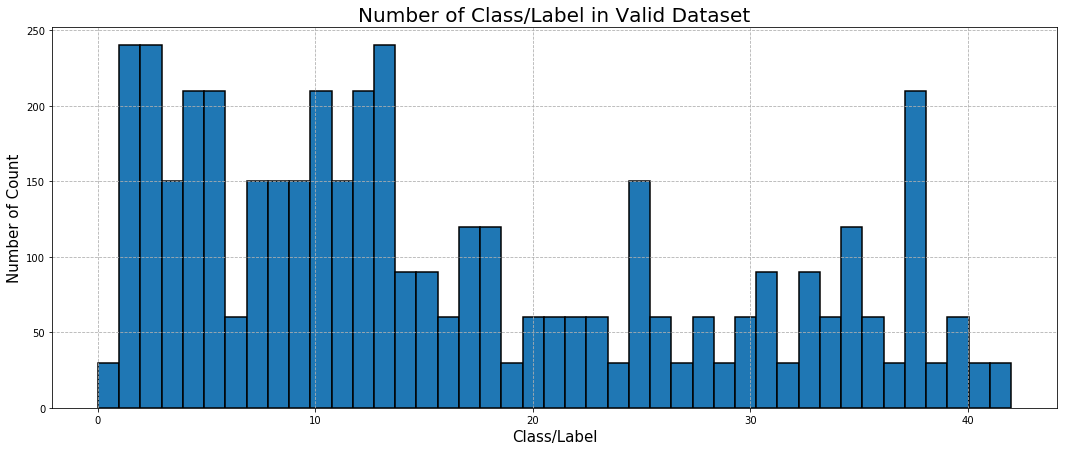

In [15]:
plot_cnt(y_valid, 'Valid');

Total Number of Dataset: 12630


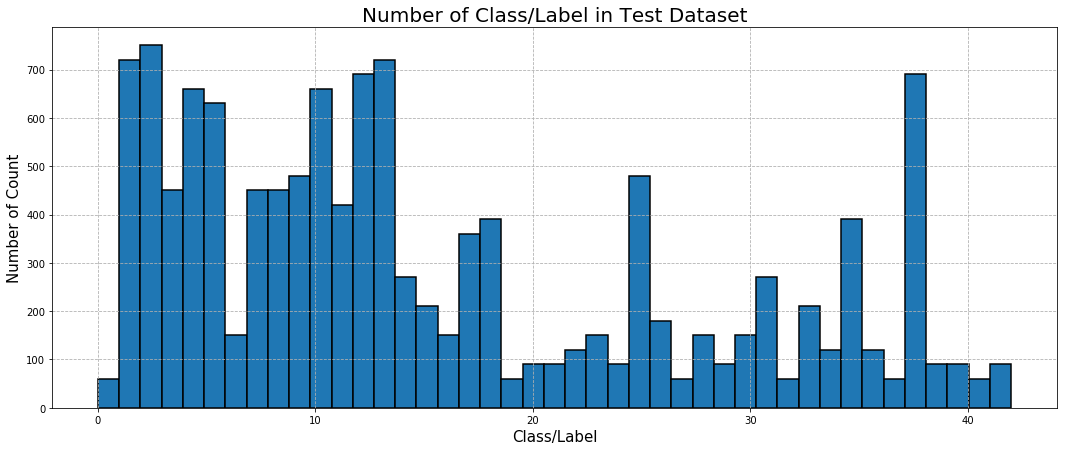

In [16]:
plot_cnt(y_test, 'Test');

In [17]:
# Plot set of images in each class/label - 2 samples
label = pd.read_csv("signnames.csv")
def plot_set_img(X, y):
    plt.figure(figsize=(18, 7))
    ran_label = random.randint(0, len(set(y)))
    set_img = X[np.where(y == ran_label)]
    print('Class:', label['SignName'][ran_label])
    print('Number of Images:', set_img.shape[0])
    for i in range(10):
        plt.subplot(1, 10, i+1)
        random_int = random.randint(0, len(set_img)-1)
        plt.axis('off')
        plt.imshow(set_img[random_int].squeeze())

Class: Pedestrians
Number of Images: 210


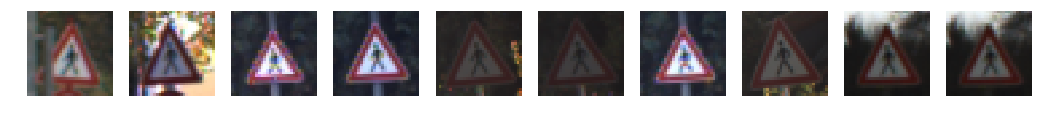

In [18]:
plot_set_img(X_train, y_train)

Class: End of no passing by vehicles over 3.5 metric tons
Number of Images: 210


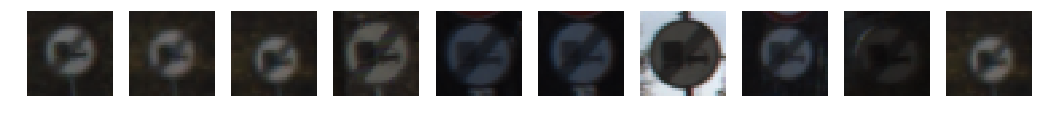

In [19]:
plot_set_img(X_train, y_train)

Class: Speed limit (60km/h)
Number of Images: 1260


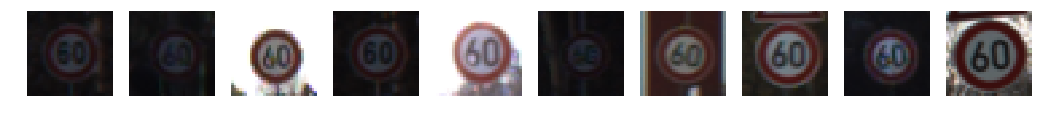

In [20]:
plot_set_img(X_train, y_train)

>Training model with unbalanced dataset makes more bias in particular classes/labels after creating CNN model.<br>
It is necessary to make balanced dataset before train the CNN model in order to get the best accuracy. <br>
In order to make balanced dataset, it requires some techniques such as image Projection and Rotation.

> The contrast and brightness of images in each class/label are different. <br>
This is not really a great training dataset for highly accuracy CNN model. <br>
There is a technique, histogram equalization, to increases contrasts for lower contrast image.<br>
This technique might applied for train dataset.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [21]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Balance Train Dataset & Data Preprocess

1. Converting to grayscale from BGR
2. Nomalize the Data set with `(pixel/128 - 1)`
3. Generate the more images by using Translation, Rotation and Affine-Transformation

#### Parameter Tuning

> In order to tune parameter for CNN model, it should make balanced and enough training data set.

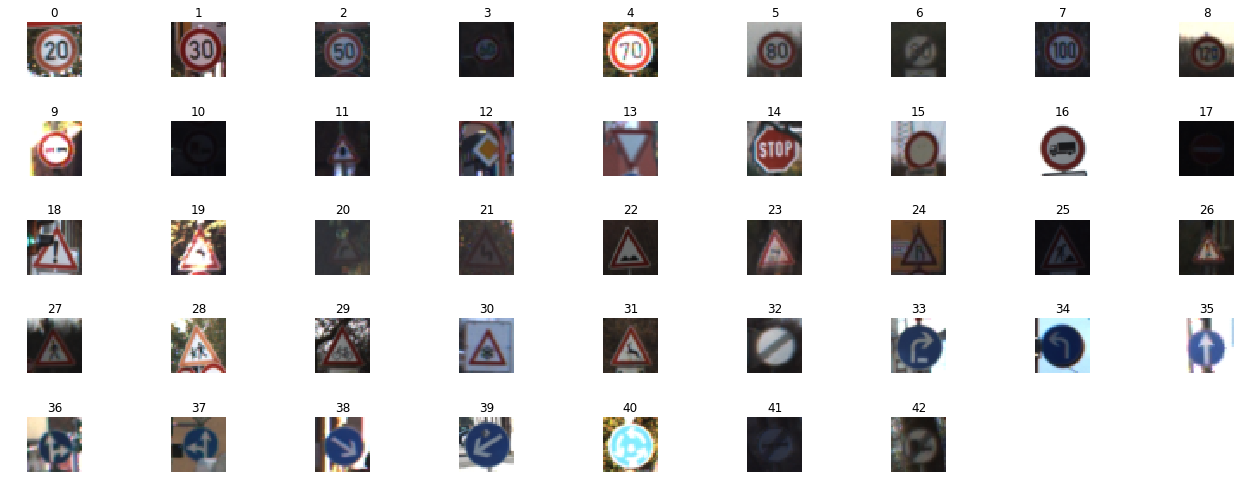

In [25]:
# plot all classes/labels to find which class/label are possible to rotate and flip
plt.figure(figsize=(18, 7))
for l in range(len(set(y_train))):
    plt.subplot(5, 9, l+1)
    label_img = X_train[np.where(y_train == l)]
    random_int = random.randint(0, len(label_img)-1)
    plt.axis('off')
    plt.tight_layout()
    plt.title(l)
    plt.imshow(label_img[random_int].squeeze())

In [26]:
def translation(img):
    '''
    The function makes translating images in random (X, Y) coordinate, between -5.0 and 5.0
    param: input image, which shape is (32, 32, 3) with BGR or (32, 32, 1) with gray
     
    output: Translated image in the same shape of the input image, (32, 32, 3) with BGR or (32, 32, 1) with gray
    '''
    y, x = img.shape[:2]
    tx, ty = np.random.uniform(-5., 5., 2)
    trans_M = np.float32([[1, 0, tx], [0, 1, ty]])
    trans_img = cv2.warpAffine(img, trans_M, (x, y))
    return trans_img

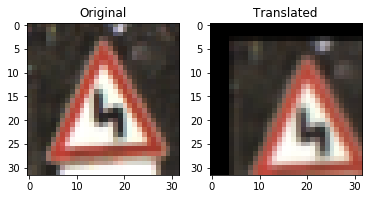

In [27]:
# plot translation result
ran_img = random.randint(0, len(X_train))
tran_img = translation(X_train[ran_img])

# Original 
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(X_train[ran_img].squeeze());

# After translation
plt.subplot(1, 2, 2)
plt.title('Translated')
plt.imshow(tran_img);

In [28]:
def rotation(img):
    '''
    The function makes rotating images in random angles, between -15.0 and 15.0 degrees.
    param: input image, which shape is (32, 32, 3) with BGR or (32, 32, 1) with gray
    
    output: Rotated image in the same shape of the input image, (32, 32, 3) with BGR or (32, 32, 1) with gray
    '''
    y, x = img.shape[:2]
    deg = np.random.uniform(-15., 15.)
    rotate_M = cv2.getRotationMatrix2D((x/2, y/2), deg, 1)
    rotate_img = cv2.warpAffine(img, rotate_M, (x, y))
    return rotate_img

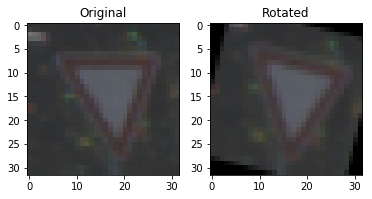

In [45]:
# plot rotation result
ran_img = random.randint(0, len(X_train))
rot_img = rotation(X_train[ran_img])

# Original 
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(X_train[ran_img].squeeze());

# After translation
plt.subplot(1, 2, 2)
plt.title('Rotated')
plt.imshow(rot_img);

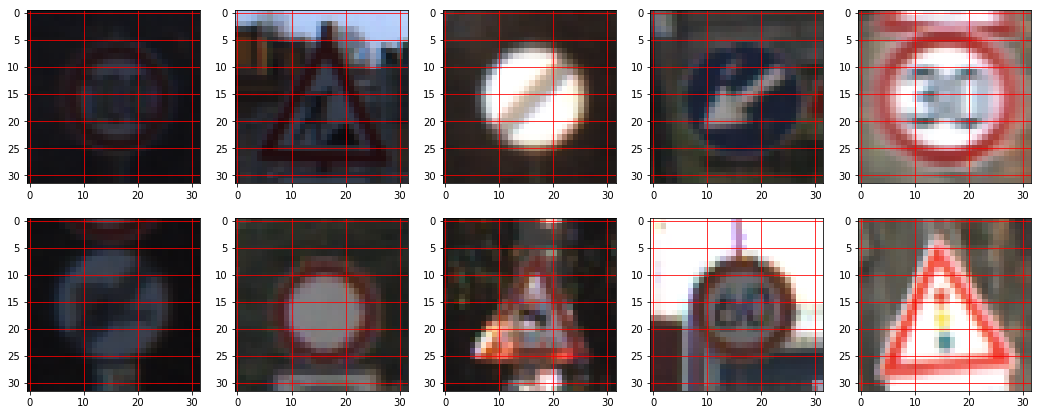

In [46]:
# Most of images (traffic sign) located within 0-5 pixels margins
plt.figure(figsize=(18, 7))
ran_imgs = np.random.randint(0, len(X_train), 10)
for i ,im in enumerate(ran_imgs):
    plt.subplot(2, len(ran_imgs)/2, i+1)
    plt.grid(linestyle='-', c='red')
    plt.imshow(X_train[im].squeeze())

In [47]:
def affineTrans(img):
    '''
    The function makes affine-transformation images in three random points, 
      - p2: Set three random points, which has 90 degree angle (Most of traffic signs, targets, inside this points).
        ex) (3.6, 3.6), (28.4, 3.6), (3.6, 28.4)
        
      - p1: There is six random number (-5., 5.) to make margins in three points.
        (It is usually not 90 degree)
      - p1, three points, drag images into p2 locations. 
      
    param: input image, which shape is (32, 32, 3) with BGR
    
    output: Rotated image in the same shape of the input image, (32, 32, 3) with BGR or (32, 32, 1) with gray
     '''
    y, x = img.shape[:2]
    ran_p1, c1, c2, c3, c4, c5, c6 = np.random.uniform(-5., 5., 7)
    p2 = np.float32([[ran_p1, ran_p1], [x-ran_p1, ran_p1], [ran_p1, y-ran_p1]])
    p1 = np.float32([[p2[0,0]-c1, p2[0,1]-c2], [p2[1,0]-c3, p2[1,1]-c4], [p2[2,0]-c5, p2[2,1]-c6]])
    aTr_M = cv2.getAffineTransform(p1, p2)
    aTr_img = cv2.warpAffine(img, aTr_M, (x, y))
    return aTr_img

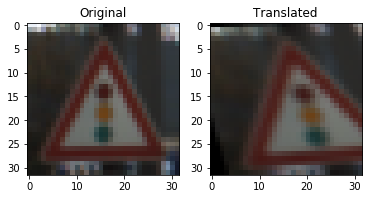

In [49]:
# plot rotation result
ran_img = random.randint(0, len(X_train))
aff_img = affineTrans(X_train[ran_img])

# Original 
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(X_train[ran_img].squeeze());

# After translation
plt.subplot(1, 2, 2)
plt.title('Translated')
plt.imshow(aff_img);

In [50]:
def generator(X, y):
    '''
    The function generate images using ramdom choose of list of functions, [translation, rotation, affineTrans].
    param: X (np.array): images, the shape of each image is (32, 32, 3) with BGR or (32, 32, 1) with gray, 34799 images
           y (np.array): classes/labels, 34799 and 43 classes/labels
    
    output: X (np.array): around 3000 images in each class/label, (num of images, 32, 32, 3) or (32, 32, 1) 
            y (np.array): same number as X, (num of images, )
    '''
    label_cnt = np.bincount(y)                    # count number of images in each class/label
    for l, cnt in enumerate(label_cnt):           # iterate in each class/label in orders
        gen_X, gen_y = [], []
        thres = 8000 + np.random.randint(-100, 100)   # set the threshold
        set_img = X[np.where(y == l)]                 # set of image in each class/label
        if cnt < thres:
            while cnt < thres:
                list_gen = [translation, rotation, affineTrans]  # list of generate functions
                ran_gen = random.choice(list_gen)                # choose generate func. randomly
                random_img = random.randint(0, len(set_img)-1)
                new_img = ran_gen(set_img[random_img])
                gen_X.append(new_img)
                gen_y.append(l)
                cnt+=1
            gen_X = np.array(gen_X)
            gen_y = np.array(gen_y)

            X = np.concatenate((X, gen_X))
            y = np.concatenate((y, gen_y))
    return X, y

In [51]:
def cvt_gray_equalization(img, eq=True):
    '''
    The function convert in an BGR image with three techniques: grayscale, histogram equalization and normalization.
    param: img - This is a single image from dataset, the shape (32, 32, 3)
           eq - Histogram Equalize, this param is on/off for cv2.equalizeHist(), defalut is True
    
    output: coverted image by 1. to gray scale, into (32, 32, 1)
                              2. apply histogram equalization to increases contrasts for lower contrast image.
                              3. normalization with (pixel - 128)/128
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if eq == True:
        gray = cv2.equalizeHist(gray)
    
    gray_norm = gray/128. - 1
    return gray_norm

In [52]:
def shuffling(X, y):
    '''
    The function is shuffling all images and classes/labels in ramdomly.
    param: X (np.array): images, the shape of each image is (32, 32, 3) or (32, 32, 1) with BGR
           y (np.array): classes/labels, 43 classes/labels
    
    output: X (np.array): shuffled X
            y (np.array): shuffled y
            ** The output of X, y are shuffled in pair.
    '''
    shuf = np.arange(X.shape[0])
    np.random.shuffle(shuf)
    
    #print(shuf)
    X, y = X[shuf], y[shuf]
    return X, y

In [53]:
def data_preprocess(X, y, gen=True, shuf=True, eq=True):
    '''
    The function is preprocessing for all images:
    include generating, converting, equalization, normalization and shuffling.
    
    param: X (np.array): images, the shape of each image is (32, 32, 3) with BGR
           y (np.array): classes/labels, 43 classes/labels
           eq - Histogram Equalize, this param is on/off for cv2.equalizeHist(), defalut is True
    
    output: X (np.array): X Training dataset, Xtr, prepare input for CNN model
            y (np.array): y Training dataset, ytr, prepare input for CNN model
    '''
    if gen == True:
        X, y = generator(X, y)
        
    yy = y
    XX = np.zeros([len(X), X.shape[1], X.shape[2]])
    for i in range(len(X)):
        gray = cvt_gray_equalization(X[i], eq)
        XX[i] = gray
    XX = XX.reshape(XX.shape + (1,))
    
    if shuf == True:
        XX, yy = shuffling(XX, yy)
    return XX, yy

In [54]:
# preprocessing train dataset
Xtr, ytr = data_preprocess(X_train, y_train)

Total Number of Dataset: 344483


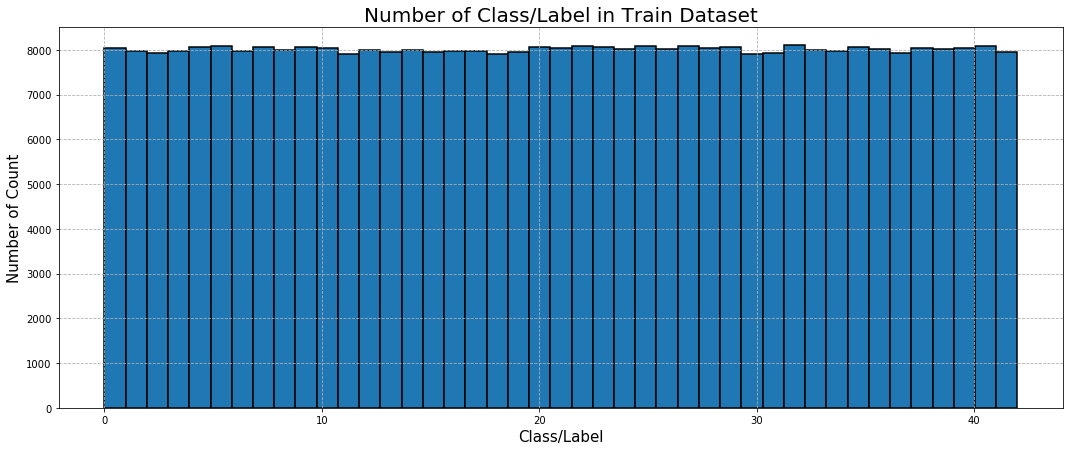

In [55]:
# plot training dateset after preprocess
plot_cnt(ytr, 'Train');

In [56]:
Xval, yval = data_preprocess(X_valid, y_valid, gen=False, shuf=False)
Xte , yte   = data_preprocess(X_test, y_test, gen=False, shuf=False)

> The training dataset is balanced after preprocess, each class/label have around 3000 images. <br>
This preprocess is include `generate fake data` with `[translation, rotation, affineTrans]`, <br>
`Normalization`, `BGR to Grayscale`, `Histogram Equalization`, and `Shuffling`.

### Model Architecture

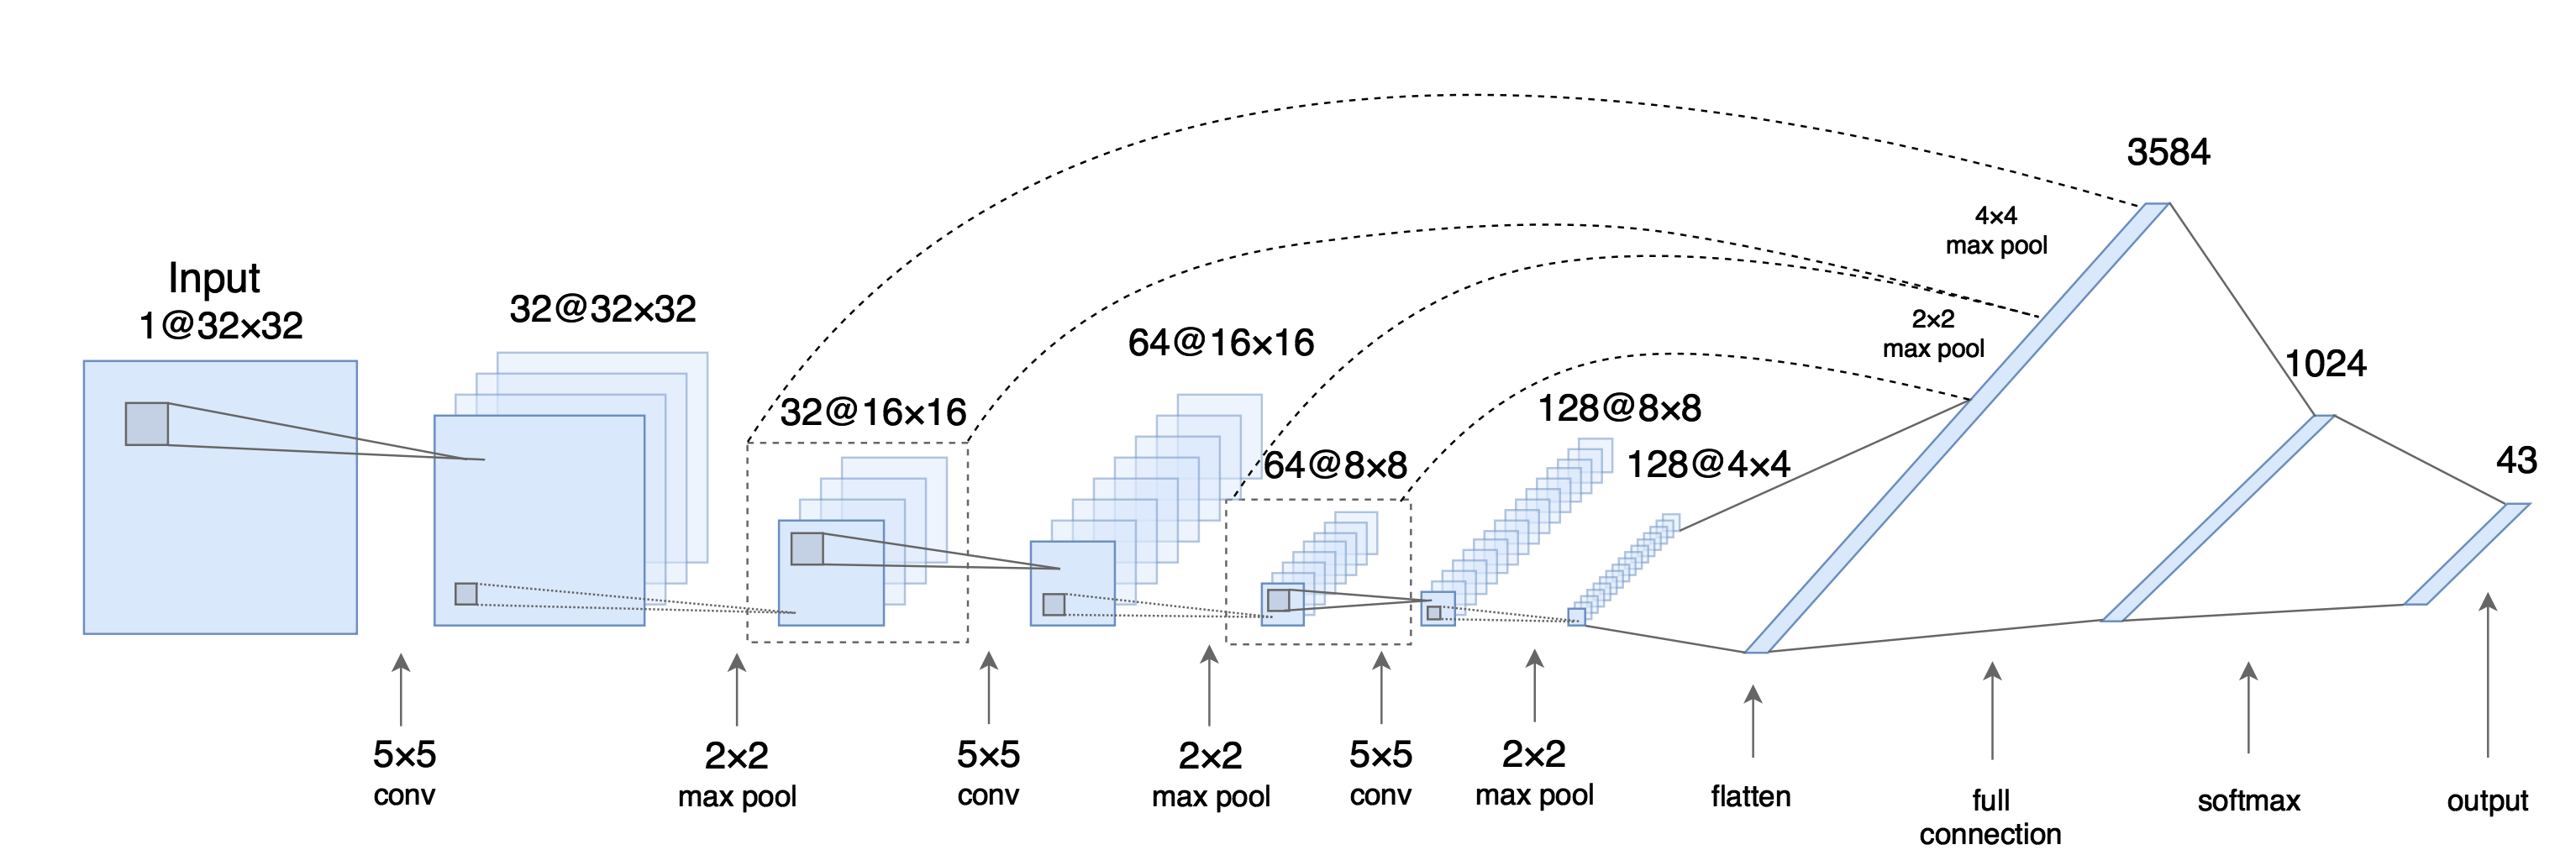

In [57]:
Image(filename='traffic_signs_architecture.png')

> The Model consist of 4 layers: For model architecture, I used Pierre Sermanet / Yann LeCun paper as reference.
  - 3 convolutional layers 
  - 1 fully connected layer

In [58]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def Traffic_Net(x):    
    mu = 0
    sigma = 0.1
    
    # Layer_1
    with tf.name_scope('conv1'):
        
        # Layer_1: Convolutional. Input = 32x32x1. Filter = 5x5. Output = 32x32x32.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma), name='conv1_W')
        conv1_b = tf.Variable(tf.zeros(32), name='conv1_b')
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

        # Layer_1: Activation: ReLU.
        conv1 = tf.nn.relu(conv1)
      
        # For Tensorboard
        conv1_W_hist = tf.summary.histogram("conv1_W", conv1_W)
        conv1_b_hist = tf.summary.histogram("conv1_b", conv1_b)
        conv1_hist   = tf.summary.histogram("conv1", conv1)
        
    with tf.name_scope('pool1') as scope:    
        
        # Layer_1: Pooling. Input = 32x32x32. Output = 16x16x32.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')
        
        # Layer_1: Dropout, 0.9
        conv1 = tf.nn.dropout(conv1, 0.9)
        
        #print('c1',conv1.shape)        
        
    # Layer_2
    with tf.name_scope('conv2'):
        
        # Layer_2: Convolutional. Input = 16x16x32. Filter = 5x5. Output = 16x16x64.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma), name='conv2_W')
        conv2_b = tf.Variable(tf.zeros(64), name='conv2_b')
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b

        # Layer_2: Activation: ReLU.
        conv2 = tf.nn.relu(conv2)
        
        # For Tensorboard
        conv2_W_hist = tf.summary.histogram("conv2_W", conv2_W)
        conv2_b_hist = tf.summary.histogram("conv2_b", conv2_b)
        conv2_hist   = tf.summary.histogram("conv2", conv2)
        
    with tf.name_scope('pool2') as scope:        
        
        # Layer_2: Pooling. Input = 16x16x64. Output = 8x8x64.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool2')
        
        # Layer_2: Dropout, 0.8
        conv2 = tf.nn.dropout(conv2, 0.8)

        #print('c2', conv2.shape)
    
    # Layer_3
    with tf.name_scope('conv3'):
        
        # Layer_3: Convolutional. Input = 8x8x64. Filter = 5x5. Output = 8x8x128.
        conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma), name='conv3_W')
        conv3_b = tf.Variable(tf.zeros(128), name='conv3_b')
        conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b

        # Layer_3: Activation: ReLU.
        conv3 = tf.nn.relu(conv3)

        # For Tensorboard
        conv3_W_hist = tf.summary.histogram("conv3_W", conv3_W)
        conv3_b_hist = tf.summary.histogram("conv3_b", conv3_b)
        conv3_hist   = tf.summary.histogram("conv3", conv3)
        
    with tf.name_scope('pool3') as scope:        
        
        # Layer_3: Pooling. Input = 8x8x128. Output = 4x4x128.
        conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool3')
        
        # Layer_3: Dropout, 0.7
        conv3 = tf.nn.dropout(conv3, 0.7) 
        
        # Flatten. Input = 4x4x128, 4x4x64, 4x4x32. Output = 2048(conv3) + 1024(conv1_pool4) + 512(conv2_pool2) = 3584
        conv1_pool_4 = tf.nn.max_pool(conv1, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='VALID')
        conv1_pool_4 = tf.contrib.layers.flatten(conv1_pool_4)
        
        conv2_pool_2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        conv2_pool_2 = tf.contrib.layers.flatten(conv2_pool_2)
        conv3 = tf.contrib.layers.flatten(conv3)
        fc0   = tf.concat(1, [conv1_pool_4, conv2_pool_2, conv3])
        
#         print('1', conv1_pool_4.get_shape())
#         print('2', conv2_pool_2.get_shape())
#         print('3', conv3.get_shape())
#         print('fc0', fc0.get_shape())
        
    # Layer_4
    with tf.name_scope('fc4'):
        
        # Layer_4: Fully Connected. Input = 3584. Output = 1024.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(3584, 1024), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(1024))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
        # Layer_4: Activation: ReLU.
        fc1   = tf.nn.relu(fc1)
        
        # Layer_4: Dropout, 0.5
        fc1   = tf.nn.dropout(fc1, 0.5)

        #print('fc1',fc1.shape)
        
    # Layer_5
    with tf.name_scope('output'):
        
        # Layer 5: Fully Connected. Input = 1024. Output = 43.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc1, fc2_W) + fc2_b
        
        #print('logits',logits.shape)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [59]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Training Model. 

> This is the step for pre-train the model using extended training dataset.
   - Hardware      : AWS g2.2xlarge
   - Training_set  : About 8000 images in each class/label
   - Optimizer     : tf.train.AdamOptimizer
   - Learning Rate : 0.001
   - Epochs        : 20
   - Batch_size    : 256

In [60]:
X = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
print(' X_Shape: ', tf.shape(X), '\n', 'y_Shape: ',tf.shape(one_hot_y))
keepRate = tf.placeholder(tf.float32)

EPOCHS = 20
BATCH_SIZE = 256

rate = 0.001

logits = Traffic_Net(X)

 X_Shape:  Tensor("Shape:0", shape=(4,), dtype=int32) 
 y_Shape:  Tensor("Shape_1:0", shape=(?,), dtype=int32)


In [61]:
with tf.name_scope('cross_entropy') as scope:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    loss          = tf.reduce_mean(cross_entropy)
    loss_summ    = tf.summary.scalar('Loss', loss)

with tf.name_scope('train') as scope:   
    optimizer    = tf.train.AdamOptimizer(learning_rate = rate)
    training_op  = optimizer.minimize(loss)
    
with tf.name_scope('accuracy') as scope:
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_op        = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc_summ           = tf.summary.scalar('Accuracy', accuracy_op)
    
saver = tf.train.Saver()

In [62]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, l = sess.run([accuracy_op, loss], feed_dict={X: batch_x, y: batch_y, keepRate: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (l * len(batch_x))
        
    return total_accuracy/num_examples, total_loss/num_examples 

In [63]:
Xtr.shape, ytr.shape, Xval.shape, yval.shape, Xte.shape, yte.shape

((344483, 32, 32, 1),
 (344483,),
 (4410, 32, 32, 1),
 (4410,),
 (12630, 32, 32, 1),
 (12630,))

In [64]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(Xtr)
    
    print("Training...")
    print()

    validation_accuracy_figure = []
    validation_loss_figure = []
    test_accuracy_figure = []
    test_loss_figure = []
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = Xtr[offset:end], ytr[offset:end]
            sess.run(training_op, feed_dict={X: batch_x, y: batch_y, keepRate: 0.5})
            
        validation_accuracy, val_loss = evaluate(Xval, yval)
        validation_accuracy_figure.append(validation_accuracy)
        validation_loss_figure.append(val_loss)
        
        test_accuracy, test_loss = evaluate(Xtr, ytr)
        test_accuracy_figure.append(test_accuracy)
        test_loss_figure.append(test_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Traffic_Net')
    print("Model saved.")

Training...

EPOCH 1 ...
Test Accuracy = 0.825
Validation Accuracy = 0.791

EPOCH 2 ...
Test Accuracy = 0.927
Validation Accuracy = 0.895

EPOCH 3 ...
Test Accuracy = 0.957
Validation Accuracy = 0.937

EPOCH 4 ...
Test Accuracy = 0.970
Validation Accuracy = 0.948

EPOCH 5 ...
Test Accuracy = 0.976
Validation Accuracy = 0.959

EPOCH 6 ...
Test Accuracy = 0.980
Validation Accuracy = 0.959

EPOCH 7 ...
Test Accuracy = 0.982
Validation Accuracy = 0.954

EPOCH 8 ...
Test Accuracy = 0.981
Validation Accuracy = 0.956

EPOCH 9 ...
Test Accuracy = 0.988
Validation Accuracy = 0.962

EPOCH 10 ...
Test Accuracy = 0.984
Validation Accuracy = 0.956

EPOCH 11 ...
Test Accuracy = 0.987
Validation Accuracy = 0.961

EPOCH 12 ...
Test Accuracy = 0.987
Validation Accuracy = 0.962

EPOCH 13 ...
Test Accuracy = 0.990
Validation Accuracy = 0.968

EPOCH 14 ...
Test Accuracy = 0.989
Validation Accuracy = 0.964

EPOCH 15 ...
Test Accuracy = 0.990
Validation Accuracy = 0.968

EPOCH 16 ...
Test Accuracy = 0.989
V

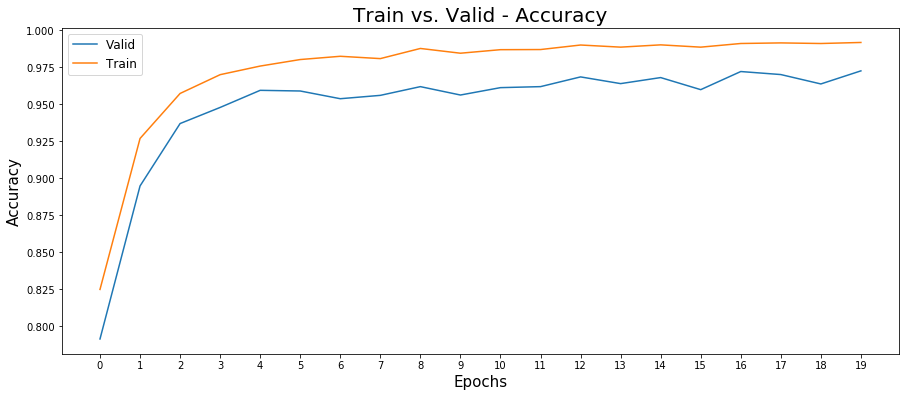

In [66]:
plt.figure(figsize=(15,6))
plt.plot(validation_accuracy_figure, label='Valid')
plt.plot(test_accuracy_figure, label='Train')
plt.legend(loc='best', fontsize = 'large')
plt.title("Train vs. Valid - Accuracy", fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(np.arange(0, EPOCHS, step=1))
plt.show()

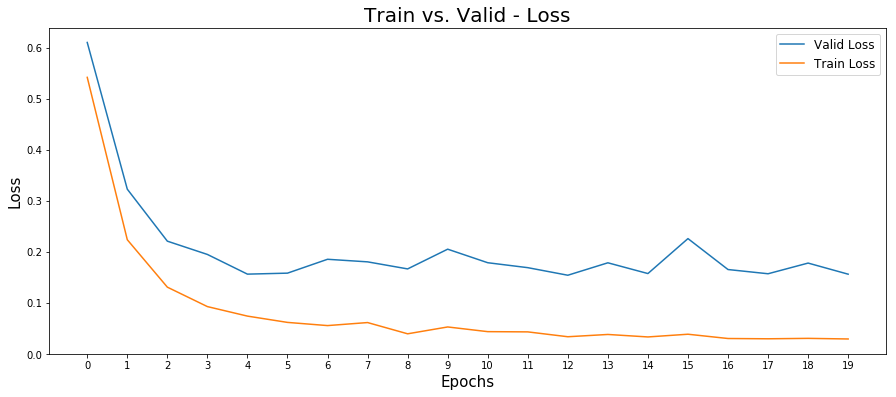

In [67]:
plt.figure(figsize=(15,6))
plt.plot(validation_loss_figure, label='Valid Loss')
plt.plot(test_loss_figure, label='Train Loss')
plt.legend(loc='best', fontsize = 'large')
plt.title("Train vs. Valid - Loss", fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(np.arange(0, EPOCHS, step=1))
plt.show()

In [68]:
# restore Pre-Training model and check the accuracy

In [69]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Traffic_Net.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print(" *** Model Evaluation ***")
    print("==========================")
    train_accuracy, _ = evaluate(Xtr, ytr)
    print("  Train Accuracy = {:.3f}".format(train_accuracy))

    valid_accuracy, _ = evaluate(Xval, yval)
    print("  Valid Accuracy = {:.3f}".format(valid_accuracy))    

    test_accuracy, _ = evaluate(Xte, yte)
    print("  Test  Accuracy = {:.3f}".format(test_accuracy))
    print("==========================")

 *** Model Evaluation ***
  Train Accuracy = 0.991
  Valid Accuracy = 0.974
  Test  Accuracy = 0.943


In [71]:
len(validation_accuracy_figure), len(validation_loss_figure), len(test_accuracy_figure), len(test_loss_figure)

(20, 20, 20, 20)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [72]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

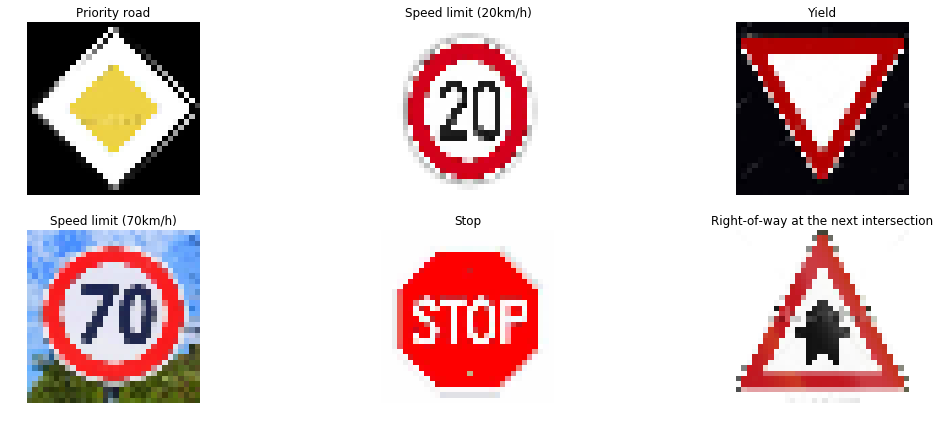

In [73]:
'''
Load new images to test the trained model:
    - Read the all images files from ./new_images/ folder
    - Resize as (32, 32)
    - cvt RGB color for visualization/plot
''' 

labels = pd.read_csv("signnames.csv")
new_images = os.listdir('./new_images/')
new_yte = np.array([12, 0, 13, 4, 14, 11])
plt.figure(figsize=(18, 7))

for n, img in enumerate(new_images):
    img = cv2.imread('./new_images/'+img)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, len(new_images)/2, n+1)
    plt.axis('off')
    plt.title(labels['SignName'][new_yte[n]])
    plt.imshow(img)
plt.show()

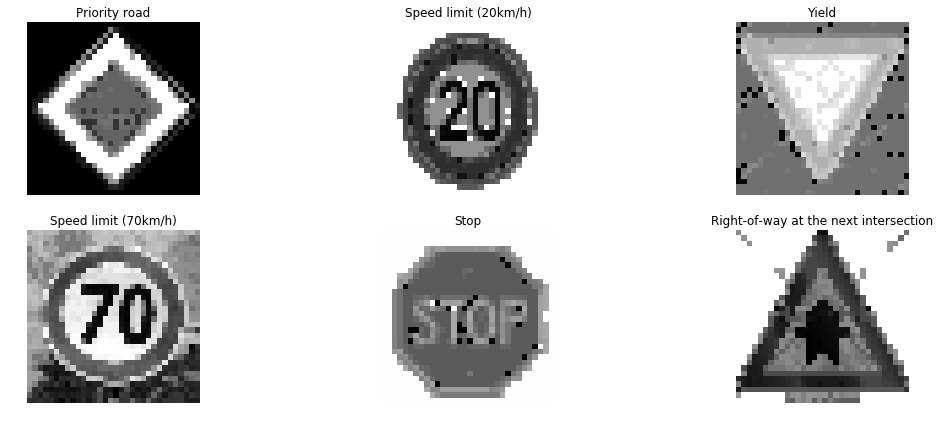

In [74]:
'''
Converting new test images into the images with Grayscale, Histogram equalization and Normalization.
  - By using the function, cvt_gray_equalization.
''' 
plt.figure(figsize=(18, 7))

for n, img in enumerate(new_images):
    img = cv2.imread('./new_images/'+img)
    img = cv2.resize(img, (32, 32))
    img = cvt_gray_equalization(img)
    
    plt.subplot(2, len(new_images)/2, n+1)
    plt.axis('off')
    plt.title(labels['SignName'][new_yte[n]])
    plt.imshow(img, cmap='gray')
plt.show()

### Predict the Sign Type for Each Image

In [75]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [76]:
new_yte

array([12,  0, 13,  4, 14, 11])

In [77]:
# make set for new_images as input ofr softmax
new_Xte = []
for n, img in enumerate(new_images):
    img = cv2.imread('./new_images/'+img)
    img = cv2.resize(img, (32, 32))
    img = cvt_gray_equalization(img)
    img = img.tolist()
    new_Xte.append(img)
new_Xte = np.array(new_Xte)
new_Xte = new_Xte.reshape(new_Xte.shape + (1,))

In [78]:
# Using sotmax function to predict from new_images
softmax_ = tf.nn.softmax(logits)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_ = sess.run(softmax_, feed_dict={X: new_Xte, keepRate: 1.0})

In [79]:
softmax_.shape

(6, 43)

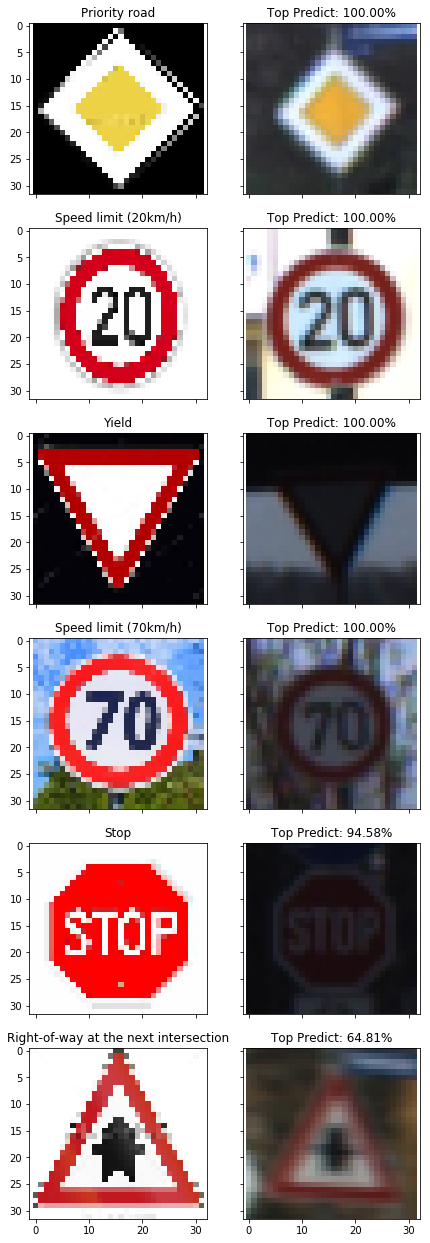

In [80]:
fig, ax = plt.subplots(6, 2, sharex='col', sharey='row', figsize=(7, 22));
for i, img in enumerate(new_images):
    img = cv2.imread('./new_images/'+img)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i, 0].set_title(labels['SignName'][new_yte[i]])
    ax[i, 0].imshow(img)

    label_img = X_train[np.where(y_train == softmax_[i].argmax())][10]
    ax[i, 1].set_title('Top Predict: {0:.2f}%'.format(100*softmax_[i][softmax_[i].argmax()]))
    ax[i, 1].imshow(label_img)
plt.show()

### Analyze Performance

In [81]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print(new_Xte.shape, new_yte.shape)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Traffic_Net.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print(" *** Model Test with New Images ***")
    print("====================================")
    train_accuracy, _ = evaluate(new_Xte, new_yte)
    print("  Accuracy = {:.3f}".format(train_accuracy))
    print("====================================")


(6, 32, 32, 1) (6,)
 *** Model Test with New Images ***
  Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [82]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [83]:
# pulling out Top 5 prediction from the result of softmax
k = 5
top_k = tf.nn.top_k(softmax_, k=k)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = sess.run(top_k, feed_dict={X: new_Xte, keepRate: 1.0})

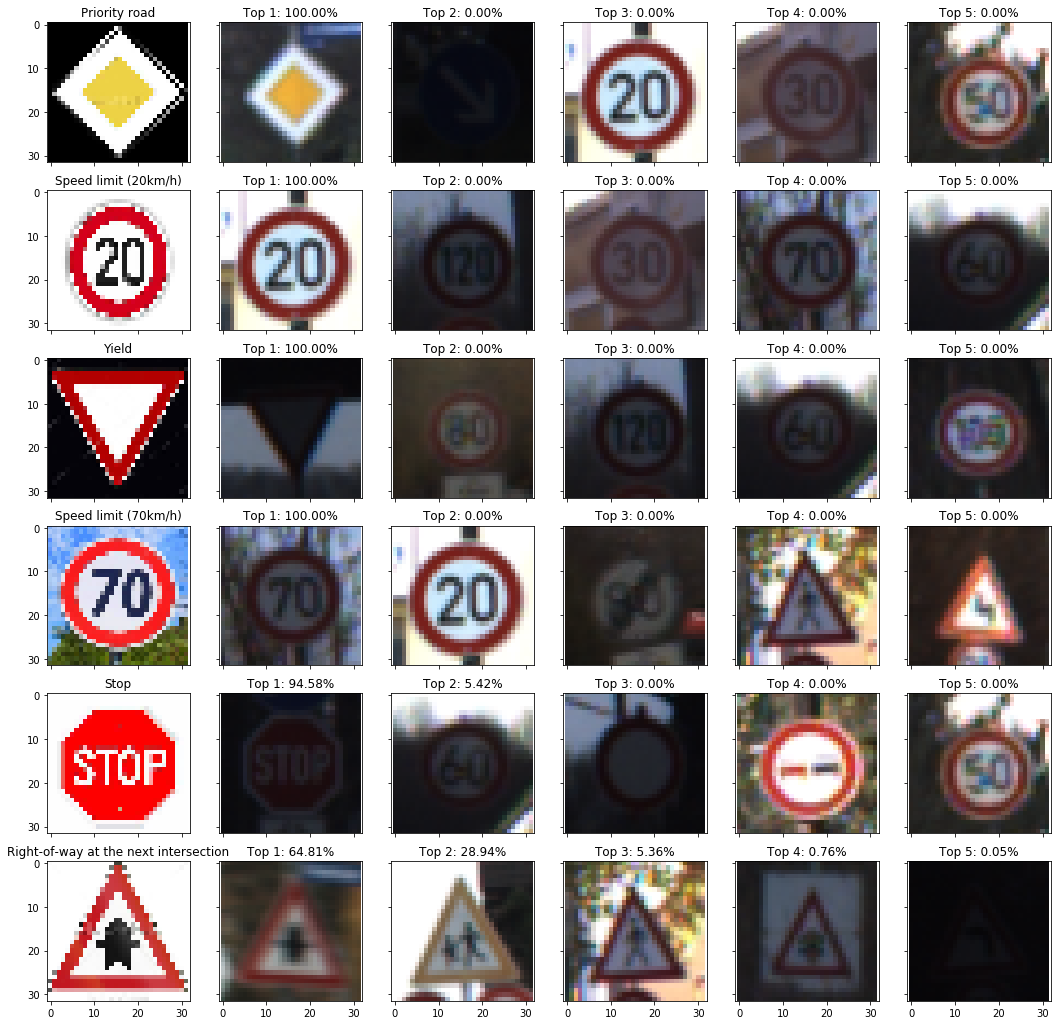

In [84]:
fig, ax = plt.subplots(6, 6, sharex='col', sharey='row', figsize=(18, 18));
for i, img in enumerate(new_images):
    img = cv2.imread('./new_images/'+img)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i, 0].set_title(labels['SignName'][new_yte[i]])
    ax[i, 0].imshow(img)
    
    for j in range(1, k+1, 1):
        label_img = X_train[np.where(y_train == top_k[1][i][j-1])][10]
        ax[i, j].set_title('Top {0}: {1:.2f}%'.format(j, 100*top_k[0][i][j-1]))
        ax[i, j].imshow(label_img)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")